In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Organizing Training data into X_train and Y_train

In [2]:
train_data= pd.read_csv("train.csv")

In [3]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Need to remove 'Cabin' feature due to lot of missing values, this can affect the prediction model else.

In [5]:
m= train_data['Cabin'].isna().sum()
print('Percentage of missing values in "Cabin":' + str((m/891)*100) + '%')

Percentage of missing values in "Cabin":77.10437710437711%


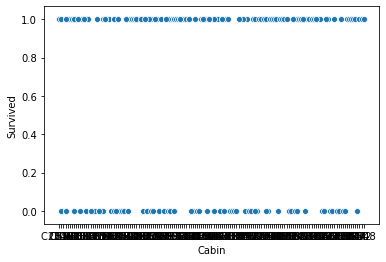

In [6]:
sns.scatterplot(x=train_data['Cabin'], y=train_data['Survived'])

## Data Visualization

#### For Variable 'Sex' 

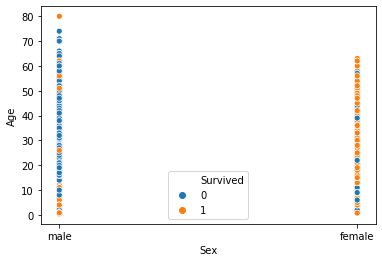

In [7]:
sns.scatterplot(x=train_data['Sex'], y=train_data['Age'], hue=train_data['Survived'])

#### For Variable 'Pclass'

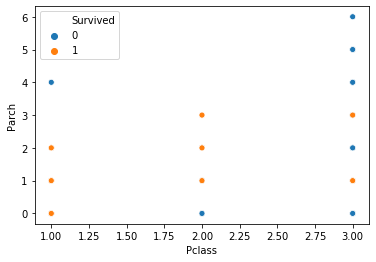

In [8]:
sns.scatterplot(x=train_data['Pclass'], y=train_data['Parch'], hue=train_data['Survived'])

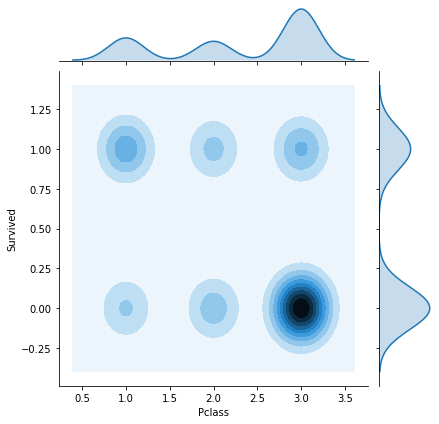

In [57]:
# 2D KDE plot
sns.jointplot(x=train_data['Pclass'], y=train_data['Survived'], kind="kde")

#### For Variable 'Fare' 

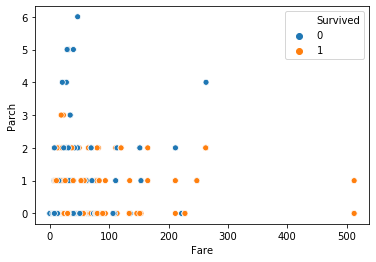

In [67]:
sns.scatterplot(x=train_data['Fare'], y=train_data['Parch'], hue=train_data['Survived'])

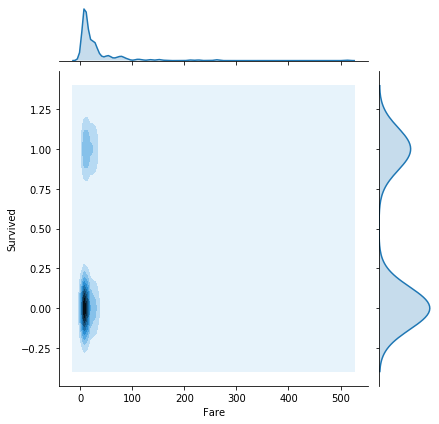

In [60]:
# 2D KDE plot
sns.jointplot(x=train_data['Fare'], y=train_data['Survived'], kind="kde")

#### For Variable 'Parch' 

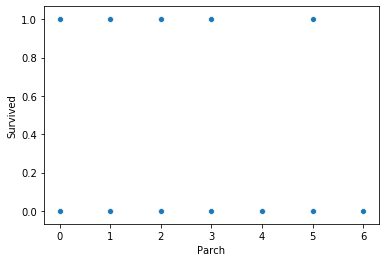

In [65]:
sns.scatterplot(x=train_data['Parch'], y=train_data['Survived'])

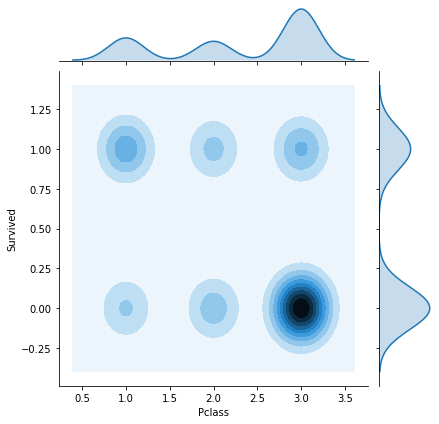

In [64]:
# 2D KDE plot
sns.jointplot(x=train_data['Pclass'], y=train_data['Survived'], kind="kde")

### Eliminating unneccesary Features 

In [9]:
eliminate= ['PassengerId','Survived', 'Name', 'Cabin']
X_train= train_data.drop(columns= eliminate)
X_train.head(10)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,female,35.0,1,0,113803,53.1000,S
4,3,male,35.0,0,0,373450,8.0500,S
5,3,male,NaN,0,0,330877,8.4583,Q
6,1,male,54.0,0,0,17463,51.8625,S
7,3,male,2.0,3,1,349909,21.0750,S
8,3,female,27.0,0,2,347742,11.1333,S
9,2,female,14.0,1,0,237736,30.0708,C


In [10]:
Y_train= train_data['Survived']
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Data-preprocessing for X_train

### Filling all missing values 

In [11]:
# Get names of columns with missing values in X_train

cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

cols_with_missing

['Age', 'Embarked']

In [12]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="most_frequent")
X_train["Embarked"] = imp.fit_transform(X_train[["Embarked"]]).ravel()

In [13]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,female,35.0,1,0,113803,53.1000,S
4,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,211536,13.0000,S
887,1,female,19.0,0,0,112053,30.0000,S
888,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,male,26.0,0,0,111369,30.0000,C


In [14]:
X_train['Embarked'].isna().sum() # Checking the number of missing values for 'Embarked'

0

In [15]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="mean")
X_train["Age"] = imp.fit_transform(X_train[["Age"]]).ravel()

In [16]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,female,35.000000,1,0,113803,53.1000,S
4,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,211536,13.0000,S
887,1,female,19.000000,0,0,112053,30.0000,S
888,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,male,26.000000,0,0,111369,30.0000,C


In [17]:
X_train['Age'].isna().sum() # Checking the number of missing values for 'Age'

0

### Encoding the data 

In [18]:
# Get list of categorical variables 
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

print(len(object_cols))

Categorical variables:
['Sex', 'Ticket', 'Embarked']
3


In [19]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Ticket'. 
X_train['Ticket']= label_encoder.fit_transform(X_train['Ticket']) 

X_train['Ticket'].unique() 

array([523, 596, 669,  49, 472, 275,  85, 395, 344, 132, 616,  38, 535,
       333, 413, 153, 480, 151, 301, 184, 139, 152, 278,  42, 329, 179,
        95, 283, 362, 598, 586, 288, 549, 600,  43, 202, 514, 302, 186,
       507,  53, 391, 634, 282, 617, 462,  76, 190, 377, 249, 522, 587,
       239,  29,  94, 555, 215, 561, 566, 197,  32, 457, 337, 601, 189,
       553, 623, 248, 270, 557, 621, 204,  80, 347, 355, 473, 158, 432,
       304, 311, 280,  25, 637, 247, 676, 652, 297, 298, 341, 678, 548,
       428, 475, 607, 612, 117, 150, 384, 361, 417, 505, 245, 354, 296,
       254, 388, 469,   2, 193, 274, 491, 176, 666, 460, 585, 540, 219,
       463, 541, 196, 318, 380, 640, 537, 111, 552, 630,  55, 504, 592,
       203, 332, 668, 438, 118, 558, 405, 113, 147, 622,  36, 516, 538,
       573, 595, 418, 654, 258, 568, 470, 559, 323, 265, 423,  28, 576,
         5, 659,  90, 412, 488, 593, 169, 574, 629, 114, 271,  34, 459,
        11, 435, 386, 122, 227, 406, 604, 452, 494, 461, 160, 30

In [20]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,22.000000,1,0,523,7.2500,S
1,1,female,38.000000,1,0,596,71.2833,C
2,3,female,26.000000,0,0,669,7.9250,S
3,1,female,35.000000,1,0,49,53.1000,S
4,3,male,35.000000,0,0,472,8.0500,S
...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,101,13.0000,S
887,1,female,19.000000,0,0,14,30.0000,S
888,3,female,29.699118,1,2,675,23.4500,S
889,1,male,26.000000,0,0,8,30.0000,C


### OneHotEncoding the remaining categorical variables 

In [21]:
# Get list of categorical variables 
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

print(len(object_cols))

Categorical variables:
['Sex', 'Embarked']
2


In [22]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)

In [23]:
OH_X_train

,Pclass,Age,SibSp,Parch,Ticket,Fare,0,1,2,3,4
0,3,22.000000,1,0,523,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,38.000000,1,0,596,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,26.000000,0,0,669,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,35.000000,1,0,49,53.1000,1.0,0.0,0.0,0.0,1.0
4,3,35.000000,0,0,472,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,101,13.0000,0.0,1.0,0.0,0.0,1.0
887,1,19.000000,0,0,14,30.0000,1.0,0.0,0.0,0.0,1.0
888,3,29.699118,1,2,675,23.4500,1.0,0.0,0.0,0.0,1.0
889,1,26.000000,0,0,8,30.0000,0.0,1.0,1.0,0.0,0.0


In [24]:
#Spliting Dataset into Training and Test sets
from sklearn.model_selection import train_test_split
X_training, X_valid, Y_training, Y_valid= train_test_split(OH_X_train, Y_train, test_size=0.2, random_state=0)

### Datasets available;
- X_training
- Y_training
- X_valid
- Y_valid

# Fitting dataset to different models

In [25]:
# all_classifiers= [classifier_SVM, classifier_SVM_l, classifier_NB, classifier_LR, classifier_RFR]

In [26]:
# Function to check accuracy for each model
# def check_accu(classifier, train_x, train_y, val_x, val_y):
#     for clas in classifier:
#         clas.fit(train_x, train_y)
#         return clas.score(val_x, val_y)
#         print('Accuracy of' + str(clasfifier[clas]) + ':' + clas.score(val_x, val_y))
    

In [27]:
# Fitting Random Forest Classifierto the training set
from sklearn.ensemble import RandomForestClassifier 
classifier= RandomForestClassifier(n_estimators= 500, criterion= 'entropy', random_state= 0) # Try with diffrent numbers of n_estimators(n_estimators= number of trees)
classifier.fit(X_training, Y_training)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
# Predicying the test set result
y_pred= classifier.predict(X_valid)
display(y_pred)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [31]:
acc= (classifier.score(X_valid, Y_valid))*100
print("Accuracy of the trained model is: " + str(acc) + "%")

Accuracy of the trained model is: 86.03351955307262%


# Accuracy of the trained model is: 86.03351955307262%

# Prediction for test set

In [69]:
test_data= pd.read_csv('test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [74]:
X_test= test_data.drop(columns= "Cabin")

## Data-preprocessing for test_data

### Fixing missing values 

In [75]:
# Get names of columns with missing values in X_train

cols_with_missing = [col for col in X_test.columns
                     if X_test[col].isnull().any()]

cols_with_missing

['Age', 'Fare']

In [88]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Ticket'. 
X_test['Ticket']= label_encoder.fit_transform(X_test['Ticket']) 

X_test['Ticket'].unique() 

array([152, 221,  73, 147, 138, 261, 158,  84, 100, 269, 195, 259,  52,
        74, 362, 343,  60, 119, 356, 120, 316, 277, 314, 313, 319, 273,
        14, 121,  11, 104, 338, 283, 280, 360,  34, 115, 166, 141, 172,
        39, 204,  16, 347,  65,  24, 355, 312, 243,  30, 290,  37, 344,
       131,  49, 335, 249, 198, 191, 253, 199,  64, 185, 159, 300, 155,
        22,  89, 250, 194, 137, 306,  13, 219,  28,  85, 236, 111, 303,
        47, 201,  72, 102, 150, 268, 224, 130, 179, 168, 297, 246,  38,
       209,  46, 354, 190, 266,  29,  57, 227, 178,  92, 278, 153, 252,
       163,  83,  68, 156, 304, 149, 113, 114, 328,  33, 337, 286, 232,
       255, 237, 245, 210, 231,  51, 164, 357,  17, 256,  90, 196, 216,
        99,  81, 353, 294,  18,  78,  43, 171,  41, 336,  20,  88,  26,
       203, 239, 214, 181, 332, 189,   1, 351, 161,  94,  54, 167,  66,
       146, 310, 361,  45, 262, 331, 106, 108, 134, 285,  58, 322,  59,
        15, 263, 305,  71, 330, 270, 296, 126,  56,   3, 274,  6

In [89]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="mean")
X_test["Age"] = imp.fit_transform(X_test[["Age"]]).ravel()
X_test["Fare"] = imp.fit_transform(X_test[["Fare"]]).ravel()

### OneHotEncoding  

In [83]:
# Get list of categorical variables 
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

print(len(object_cols))

Categorical variables:
['Sex', 'Embarked']
2


In [90]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_test = pd.DataFrame(OH_encoder.fit_transform(X_test[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_test.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_test = X_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [92]:

OH_X_test= OH_X_test.drop(columns= "Name")

In [97]:

OH_X_test= OH_X_test.drop(columns= "PassengerId")

In [98]:
OH_X_test

,Pclass,Age,SibSp,Parch,Ticket,Fare,0,1,2,3,4
0,3,34.50000,0,0,152,7.8292,0.0,1.0,0.0,1.0,0.0
1,3,47.00000,1,0,221,7.0000,1.0,0.0,0.0,0.0,1.0
2,2,62.00000,0,0,73,9.6875,0.0,1.0,0.0,1.0,0.0
3,3,27.00000,0,0,147,8.6625,0.0,1.0,0.0,0.0,1.0
4,3,22.00000,1,1,138,12.2875,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,267,8.0500,0.0,1.0,0.0,0.0,1.0
414,1,39.00000,0,0,324,108.9000,1.0,0.0,1.0,0.0,0.0
415,3,38.50000,0,0,346,7.2500,0.0,1.0,0.0,0.0,1.0
416,3,30.27259,0,0,220,8.0500,0.0,1.0,0.0,0.0,1.0


In [99]:
X_training

,Pclass,Age,SibSp,Parch,Ticket,Fare,0,1,2,3,4
140,3,29.699118,0,2,203,15.2458,1.0,0.0,1.0,0.0,0.0
439,2,31.000000,0,0,547,10.5000,0.0,1.0,0.0,0.0,1.0
817,2,31.000000,1,1,618,37.0042,0.0,1.0,1.0,0.0,0.0
378,3,20.000000,0,0,183,4.0125,0.0,1.0,1.0,0.0,0.0
491,3,21.000000,0,0,649,7.2500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
835,1,39.000000,1,1,609,83.1583,1.0,0.0,1.0,0.0,0.0
192,3,19.000000,1,0,406,7.8542,1.0,0.0,0.0,0.0,1.0
629,3,29.699118,0,0,286,7.7333,0.0,1.0,0.0,1.0,0.0
559,3,36.000000,1,0,300,17.4000,1.0,0.0,0.0,0.0,1.0


In [100]:
test_pred= classifier.predict(OH_X_test)

# Prediction result for test set:

In [101]:
test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,